In this example we create our first instance of a patternWalker and visualise its patterns (ordered by parts) in a heatmap. 

In [1]:
from pattern_walker import fullProbPatternWalker as pw
from pattern_walker.utils import balanced_ditree,filter_nodes #(1) c-ary tree with edges pointing away from root
import numpy as np
from seaborn import heatmap

We begin by setting the model parameters. $c$ and $h$ define the hierarchy -- the $c$-ary tree of height $h$. The remaining parameters relate to the patterns on that tree. *Note*: If we are looking at single realisations, it is best to choose extreme values (such as a_root=1, Gamma=Gamma_root=0) to obtain helpful visualisations

In [2]:
c=3 #number of Parts (coordination number of tree)
h=4 #height of tree (shortest distance between root and any leaf)
L=48 #number of bits to a pattern (length of glossary)
a_root=1 #expectation of root bits
Gamma_root=0.0 #noise on Act(root)-level 
Gamma=0.0 #noise below Part-level
a_high=(1-a_root)*Gamma_root+a_root #expectation of Part-specific bits
a_low=(1-a_root)*Gamma_root+a_root/10 #expectation of Part-generic bits
Delta=4 #overlap between Parts

Make a rooted $c$-ary tree. 

In [3]:
tree,root = balanced_ditree(c,h)

Now plug in all the parameters to create a patternWalker

In [4]:
Walker=pw(tree, root, L, a_root, a_low, a_high, Delta, Gamma, Gamma_root)

Patterns and weights are not set by default (actually, why not?)

In [5]:
Walker.set_weights()

Walker is derived from networkx.DiGraph, so we can access patterns (and other node properties) using the G.nodes iterable

In [6]:
pattern_array=[ Walker.nodes[node]['pattern'] for node in Walker]

To visualise patterns in a heatmap:

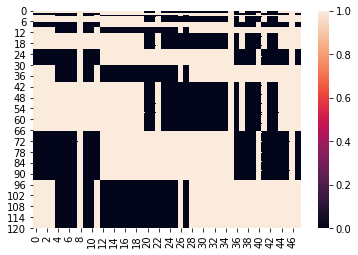

In [7]:
heatmap(pattern_array)

It would be nice to have the patterns ordered by their Part to see if Delta (the Part overlap) works as advertised. To this end, we can use the filter_nodes function (for convenience). We put root, not belonging to any Part, in front.

In [8]:
Parts=[[root]]+[filter_nodes(Walker,'Part',i) for i in range(1,c+1)]

Now retrieve patterns in the order given in this array.

In [9]:
pattern_array=[ Walker.nodes[node]['pattern'] for Part in Parts for node in Part]

Convert to numpy.arrary and transpose. Optional; this way patterns run from top to bottom, each column representing a pattern, which I find makes for a better visualisation.

In [10]:
pattern_array=np.array(pattern_array).T

Simply feed this into seaborn.heatmap

Text(0.5, 15.0, 'Pattern')

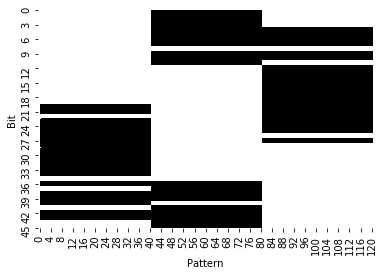

In [11]:
ax=heatmap(pattern_array,cmap=['black','white'],cbar=False)
ax.set_ylabel('Bit')
ax.set_xlabel('Pattern')

Let's now check if the average patterns are described by a_low, a_high, Delta and $a$ as advertised.
To this end, extract the patterns as above, reset them using the class-method pw.reset_patterns(), and repeat a (large) number of times. 

In [18]:
pattern_array=np.zeros((L,len(Walker)))
for _ in range(100):
    temp=[ Walker.nodes[node]['pattern'] for Part in Parts for node in Part]
    pattern_array+=np.array(temp).T
    Walker.reset_patterns()
pattern_array/=100

Replot as above

Text(0.5, 15.0, 'Pattern')

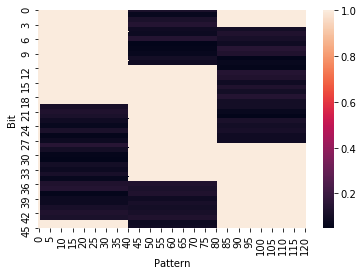

In [20]:
ax=heatmap(pattern_array)
ax.set_ylabel('Bit')
ax.set_xlabel('Pattern')

We can also choose less extreme parameters, as we are not dependent on single realisations any more. 

In [53]:
c=3 #number of Parts (coordination number of tree)
h=4 #height of tree (shortest distance between root and any leaf)
L=48 #number of bits to a pattern (length of glossary)
a_root=0.2 #expectation of root bits
Gamma_root=0.4 #noise on Act(root)-level 
Gamma=0.3 #noise below Part-level
a_high=(1-a_root)*Gamma_root+a_root #expectation of Part-specific bits
a_low=(1-a_root)*Gamma_root+a_root/10 #expectation of Part-generic bits
Delta=4 #overlap between Parts

In [54]:
Walker=pw(tree, root, L, a_root, a_low, a_high, Delta, Gamma, Gamma_root)
Walker.set_weights()
Parts=[[root]]+[filter_nodes(Walker,'Part',i) for i in range(1,c+1)] #with new instance, parts might be enumerated differently

In [55]:
pattern_array=np.zeros((L,len(Walker)))
num_samples=200
for _ in range(num_samples):
    temp=[ Walker.nodes[node]['pattern'] for Part in Parts for node in Part]
    pattern_array+=np.array(temp).T
    Walker.reset_patterns()
pattern_array/=num_samples #don't forget to normalise

Text(0.5, 15.0, 'Pattern')

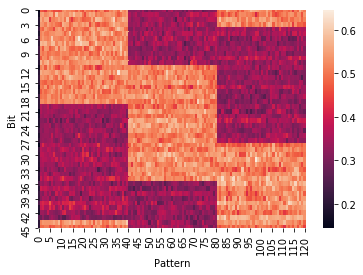

In [56]:
ax=heatmap(pattern_array)
ax.set_ylabel('Bit')
ax.set_xlabel('Pattern')

Compare to the preset values for a_root, a_low and a_high

In [57]:
print(a_root,a_low,a_high)

0.2 0.3400000000000001 0.52
